In [1]:
# ----------------------------------------------------------------------------
# Author        :    Vasileios Perifanis
# Affiliation   :    Euclid team, Democritus University of Thrace, Dept. of Electrical & Computer Engineering
# Created Date  :    03/2022
# version       :    1.0
# ---------------------------------------------------------------------------

In [2]:
import numpy as np # linear algebra
import pandas as pd # data analysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("datasets/titanic_train.csv", header=0) # read csv

data['Embarked'].fillna('S',inplace=True)

data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

data['Fare_Range']=pd.qcut(data['Fare'],5)
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

data.drop(['Name','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [4]:
data.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
Family_Size      0
Alone            0
Fare_cat         0
dtype: int64

In [5]:
def train_sk(train_X, train_Y, test_X, test_Y):
    # initialize classifier
    classifier = MLPClassifier(hidden_layer_sizes=(32,32,32), random_state=0, max_iter=500)

    # train the classifier
    classifier.fit(train_X,train_Y)

    # make predictions on train/test set
    y_pred_train = classifier.predict(train_X)
    y_pred = classifier.predict(test_X)

    # calculate scores
    accuracy_train = accuracy_score(y_pred_train, train_Y)
    precision_train = precision_score(y_pred_train, train_Y)
    recall_train = recall_score(y_pred_train, train_Y)
    f1_train = f1_score(y_pred_train, train_Y)

    accuracy = accuracy_score(y_pred, test_Y)
    precision = precision_score(y_pred, test_Y)
    recall = recall_score(y_pred, test_Y)
    f1 = f1_score(y_pred, test_Y)

    print(f"[Training set] Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1: {f1_train:.4f}\n",
          f"[Testing set] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return accuracy, precision, recall, f1

In [6]:
train,test=train_test_split(data,test_size=0.2,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]].to_numpy()
train_Y=train[train.columns[:1]].to_numpy().ravel()
test_X=test[test.columns[1:]].to_numpy()
test_Y=test[test.columns[:1]].to_numpy().ravel()

In [7]:
accuracy, precision, recall, f1 = dict(), dict(), dict(), dict()

# Univariate feature imputation

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train_X)
train_X_mean = imp.transform(train_X)
test_X_mean = imp.transform(test_X)

In [10]:
acc, prec, rec, f = train_sk(train_X_mean, train_Y, test_X_mean, test_Y)
accuracy['mean'] = acc
precision['mean'] = prec
recall['mean'] = rec
f1['mean'] = f

[Training set] Accuracy: 0.8469, Precision: 0.7289, Recall: 0.8504, F1: 0.7850
 [Testing set] Accuracy: 0.7821, Precision: 0.6087, Recall: 0.7778, F1: 0.6829


In [11]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(train_X)
train_X_median = imp.transform(train_X)
test_X_median = imp.transform(test_X)

In [12]:
acc, prec, rec, f = train_sk(train_X_median, train_Y, test_X_median, test_Y)
accuracy['median'] = acc
precision['median'] = prec
recall['median'] = rec
f1['median'] = f

[Training set] Accuracy: 0.8329, Precision: 0.7473, Recall: 0.8031, F1: 0.7742
 [Testing set] Accuracy: 0.7933, Precision: 0.6522, Recall: 0.7759, F1: 0.7087


In [13]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(train_X)
train_X_mode = imp.transform(train_X)
test_X_mode = imp.transform(test_X)

In [14]:
acc, prec, rec, f = train_sk(train_X_mode, train_Y, test_X_mode, test_Y)
accuracy['mode'] = acc
precision['mode'] = prec
recall['mode'] = rec
f1['mode'] = f

[Training set] Accuracy: 0.8301, Precision: 0.7729, Recall: 0.7815, F1: 0.7772
 [Testing set] Accuracy: 0.7654, Precision: 0.6957, Recall: 0.6957, F1: 0.6957


In [15]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1.)
imp.fit(train_X)
train_X_custom = imp.transform(train_X)
test_X_custom = imp.transform(test_X)

In [16]:
acc, prec, rec, f = train_sk(train_X_custom, train_Y, test_X_custom, test_Y)
accuracy['constant'] = acc
precision['constant'] = prec
recall['constant'] = rec
f1['constant'] = f

[Training set] Accuracy: 0.8736, Precision: 0.7875, Recall: 0.8704, F1: 0.8269
 [Testing set] Accuracy: 0.7765, Precision: 0.6232, Recall: 0.7544, F1: 0.6825


# Multivariate feature imputation

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [18]:
imp = IterativeImputer(missing_values=np.nan, random_state=0, initial_strategy='median', verbose=2)
imp.fit(train_X)
train_X_iterative = imp.transform(train_X)
test_X_iterative = imp.transform(test_X)

[IterativeImputer] Completing matrix with shape (712, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 32.81725350633285, scaled tolerance: 0.08 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.03
[IterativeImputer] Change: 0.0, scaled tolerance: 0.08 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (712, 9)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.00
[IterativeImputer] Completing matrix with shape (179, 9)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.00


In [19]:
acc, prec, rec, f = train_sk(train_X_iterative, train_Y, test_X_iterative, test_Y)
accuracy['iterative'] = acc
precision['iterative'] = prec
recall['iterative'] = rec
f1['iterative'] = f

[Training set] Accuracy: 0.8385, Precision: 0.7033, Recall: 0.8496, F1: 0.7695
 [Testing set] Accuracy: 0.7821, Precision: 0.6087, Recall: 0.7778, F1: 0.6829


# K-NN Imputer

In [20]:
from sklearn.impute import KNNImputer

In [21]:
imp = KNNImputer(missing_values=np.nan, n_neighbors=3)
imp.fit(train_X)
train_X_knn = imp.transform(train_X)
test_X_knn = imp.transform(test_X)

In [22]:
acc, prec, rec, f = train_sk(train_X_knn, train_Y, test_X_knn, test_Y)
accuracy['knn'] = acc
precision['knn'] = prec
recall['knn'] = rec
f1['knn'] = f

[Training set] Accuracy: 0.8455, Precision: 0.7363, Recall: 0.8410, F1: 0.7852
 [Testing set] Accuracy: 0.7821, Precision: 0.6087, Recall: 0.7778, F1: 0.6829


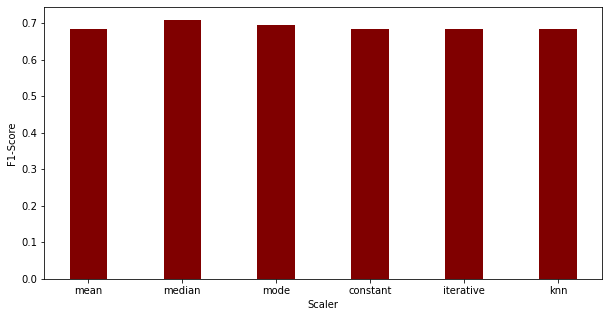

In [23]:
import matplotlib.pyplot as plt

scalers = list(f1.keys())
f_scores = list(f1.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(scalers, f_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Scaler")
plt.ylabel("F1-Score")
plt.show()

In [24]:
accuracy, precision, recall, f1

({'mean': 0.7821229050279329,
  'median': 0.7932960893854749,
  'mode': 0.7653631284916201,
  'constant': 0.776536312849162,
  'iterative': 0.7821229050279329,
  'knn': 0.7821229050279329},
 {'mean': 0.6086956521739131,
  'median': 0.6521739130434783,
  'mode': 0.6956521739130435,
  'constant': 0.6231884057971014,
  'iterative': 0.6086956521739131,
  'knn': 0.6086956521739131},
 {'mean': 0.7777777777777778,
  'median': 0.7758620689655172,
  'mode': 0.6956521739130435,
  'constant': 0.7543859649122807,
  'iterative': 0.7777777777777778,
  'knn': 0.7777777777777778},
 {'mean': 0.6829268292682927,
  'median': 0.7086614173228347,
  'mode': 0.6956521739130435,
  'constant': 0.6825396825396826,
  'iterative': 0.6829268292682927,
  'knn': 0.6829268292682927})